In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# get the datasets
dataset = pd.read_csv("salary_data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
#Get the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
#Check the missing value present in the dataset
dataset.isnull().sum()

,0
YearsExperience,0
Salary,0


In [8]:
#Check the size of the data
dataset.shape

(30, 2)

In [9]:
#Get the stastical information about data
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
x = dataset.drop(['Salary'],axis= True)
y = dataset['Salary']

In [11]:
#Split the data into training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

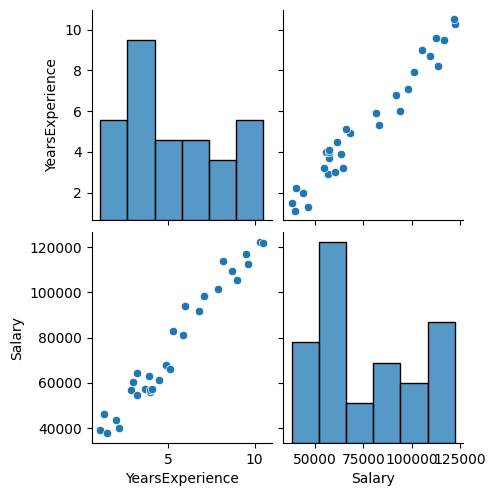

In [14]:
sns.pairplot(dataset)

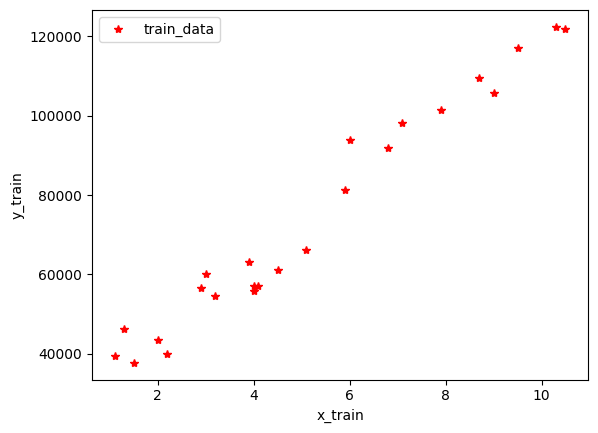

In [15]:
#Visuallize only tain data set
plt.plot(x_train,y_train,'r*',label='train_data')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()


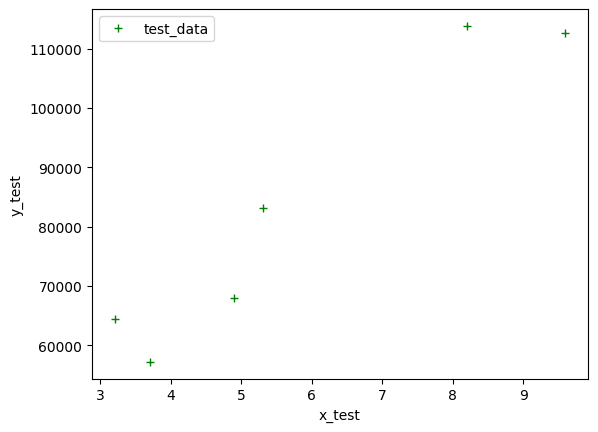

In [16]:
#Visuallize only test data set
plt.plot(x_test,y_test,'g+',label='test_data')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [17]:
#Training simple linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
#Predicting the test set results
y_pred=regressor.predict(x_test).round(1)

In [19]:
calculation=pd.DataFrame(np.c_[y_test,y_pred],columns=["Original Salary","Predict Salary"])
calculation

,Original Salary,Predict Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


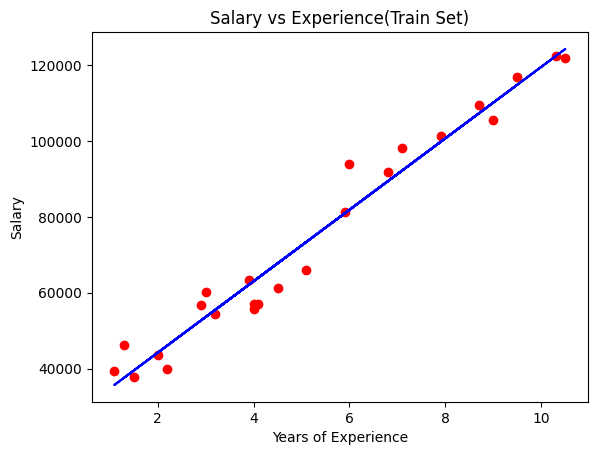

In [20]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience(Train Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

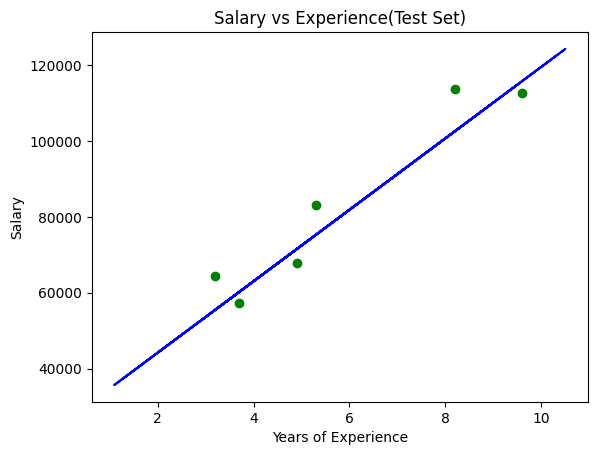

In [21]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()